# TESLA INC. 

# ANALYSIS OF STOCK MARKET ( 2012 - 2020)

# 

IMPORTING REQUIRED LIBRARIES

In [32]:
# PANDAS for data analysis and manipulation.
# NUMPY for array implementations.
# MATPLOTLIB and SEABORN for visualisation.
# STATSMODEL do to statistical analysis.
# XLRD for reading and formatting excel file data.

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%pip install xlrd

Note: you may need to restart the kernel to use updated packages.


# 

# DATA 

In [33]:
# Readind excel data into DATA FRAME named 'tsla' and printing top rows to check data.

tsla=pd.read_excel(r'/Users/radhikagarg/Desktop/TSLA_DATA.xlsx')
print(tsla.head())

  2020-09-30 00:00:00  404.49   0.27  0.0472  139.3  42.04  0  1
0          2020-06-30  179.78  0.100  0.0428   90.7  30.82  1  1
1          2020-03-31  122.84  0.016 -0.0176   88.4  39.42  0  0
2          2019-12-31   70.88  0.112 -0.1307  112.0  50.00  1  1
3          2019-09-30   47.21  0.160 -0.1353   97.0  49.32  0  0
4          2019-06-30   43.15 -0.462 -0.1155   95.2  52.83  0  1


In [34]:
# Setting 'tsla's column names.
# Using INFO method to know about features of data.
# Using DESCRIBE method to obtain 5 number summary of features.

tsla.columns=["DATE","SHARE_PRICE","EPS","ROE","SALES(000)","OIL_PRICE","DEVELOPMENTS","COMPETITORS"]
print(tsla.info())
print(tsla.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   DATE          38 non-null     datetime64[ns]
 1   SHARE_PRICE   38 non-null     float64       
 2   EPS           38 non-null     float64       
 3   ROE           38 non-null     float64       
 4   SALES(000)    38 non-null     float64       
 5   OIL_PRICE     38 non-null     float64       
 6   DEVELOPMENTS  38 non-null     int64         
 7   COMPETITORS   38 non-null     int64         
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 2.5 KB
None
       SHARE_PRICE        EPS        ROE  SALES(000)  OIL_PRICE  DEVELOPMENTS  \
count    38.000000  38.000000  38.000000   38.000000  38.000000     38.000000   
mean     44.665263  -0.226787  -0.819513   28.452368  62.417632      0.315789   
std      34.069979   0.295308   1.123302   34.208212  23.387988      0.471069   


# 

# DATA VISUALISATION

Let's look at TESLA'S share price trends from the past 5 years. 

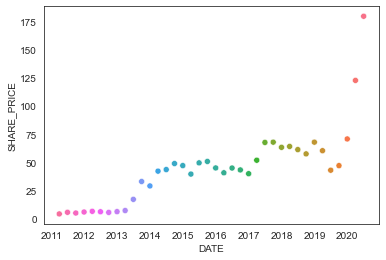

In [35]:
# PLOTTING Quaterly Share Prices against Dates.
import seaborn as sns
g=sns.scatterplot(data=tsla,x='DATE',y='SHARE_PRICE',hue='DATE').legend_.remove()

TESLA stocks have shown tremendous increment over the years as seen by the upward trend in the scatter plot.
Let's analyze the data further to interpret the possible reasons of this growth.

# 

Let's analyze the features via BOXPLOTS!

<AxesSubplot:>

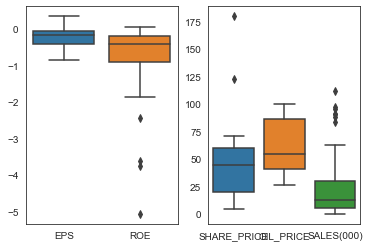

In [36]:
# Visualizing Quantitative data via BOXPLOTS.

fig, axs = plt.subplots(ncols=2)
sns.set_style("whitegrid")
sns.boxplot(data=tsla[['EPS','ROE']],ax=axs[0])
sns.boxplot(data=tsla[['SHARE_PRICE','OIL_PRICE','SALES(000)']],ax=axs[1])

The boxplots help us to see how features 'EPS' and 'ROE'(presence of outliers detected) have a very low variance as compared to 'SHARE PRICE'(presence of outliers detected),'OIL PRICE' and 'SALES(000)'(presence of outliers detect). Data features with low variance tend to have a very low impact on data modelling and and prediction due to consistent values. 
Let's dive futher and analyze each feature!

# 

Let's analyze the SHARE PRICE ~ features via SCATTERPLOTS!

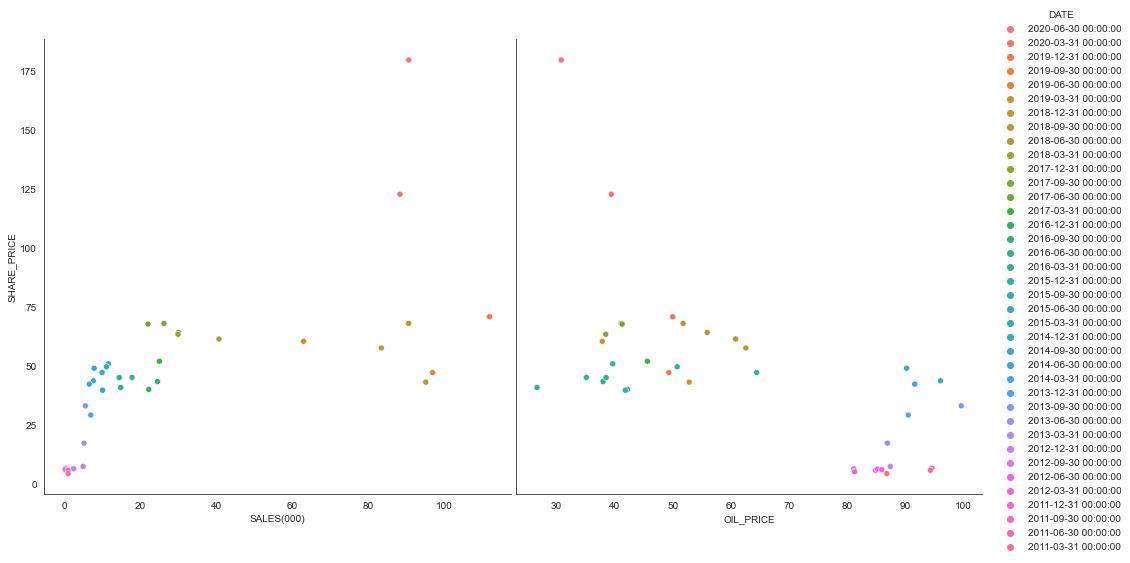

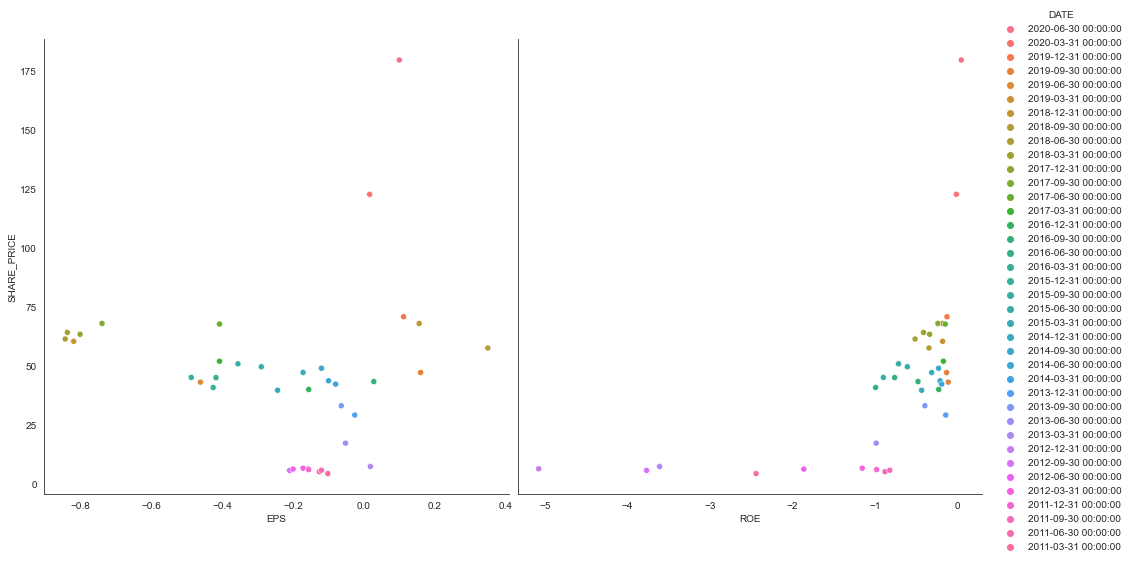

In [37]:
sns.set_style("white")
sns.pairplot(tsla,x_vars=['SALES(000)','OIL_PRICE'],y_vars='SHARE_PRICE',height=7,kind='scatter',diag_kind=None,hue='DATE')
sns.pairplot(tsla,x_vars=['EPS','ROE'], y_vars='SHARE_PRICE',height=7,kind='scatter',diag_kind=None,hue='DATE')

SUPRISINGLY RANDOM BEHAVIORS are observed! No pattern can be interpreted as such when comparing SHARE PRICES with 
the slected features in TESLA dataset from the scatterplot.

# 

# CORRELATION

We need to analyze the correlations via a HEATMAP.

<AxesSubplot:>

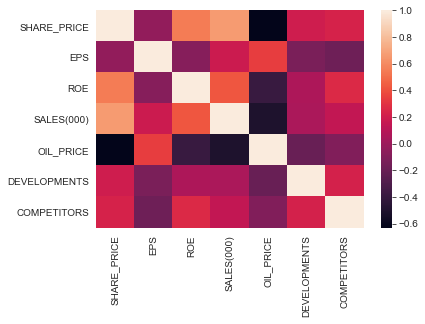

In [38]:
sns.heatmap(tsla.corr())

SHARE PRICES is showing 0 correlation with EPS, relatively POSITIVE with ROE, SALES(000) and STRONG NEGATIVE with OIL PRICES.

ROE seems POSITIVELY correlated to SALES(000) and NEGATIVE correlation with OIL PRICES. # MULTICOLLINEARITY
ROE 

DEVELOPMENTS and COMPETITORS are the features which do not seem to affect other features drasticaly.

# 

# LINEAR REGRESSION

Now let's try to fit LINEAR REGRESSION MODEL for SHARE PRICES ~ SALES(000), EPS, ROE and OIL PRICES.

In [40]:
# FIRST REGRESSION MODEL.
from sklearn.linear_model import LinearRegression

# INDEPENDENT VARS.
x=tsla[["SALES(000)","OIL_PRICE","EPS","ROE","DEVELOPMENTS","COMPETITORS"]]
# DEPENDENT VAR
y=tsla[["SHARE_PRICE"]]

# Create LINEAR MODEL and FIT. 
lr=LinearRegression().fit(x,y)

# INTERCEPT,COEFS and R SQUARED.
print("INTERCEPT", model.intercept_,"\n")
print("COEFS", model.coef_,"\n")
print("R_SQUARED", model.score(x,y),"\n")
# Create OLS MODEL and fit to obtain P VALUES.
model_stats = sm.OLS(y,x).fit()
print("P VALUES OF EACH FEATURE")
print(model_stats.pvalues)

INTERCEPT [61.73412393] 

COEFS [ 0.29768613 -0.35007811  0.          4.499854    0.          0.        ] 

R_SQUARED 0.5591103390583192 

P VALUES OF EACH FEATURE
SALES(000)      7.082513e-07
OIL_PRICE       6.597000e-02
EPS             6.373993e-02
ROE             2.184338e-01
DEVELOPMENTS    1.775916e-01
COMPETITORS     6.864658e-01
dtype: float64


The model explains 60% data but relative higher p values. LETS IMPROVE THE MODEL!

# 

Let's plot individual regression line to see if any improvements can be made.

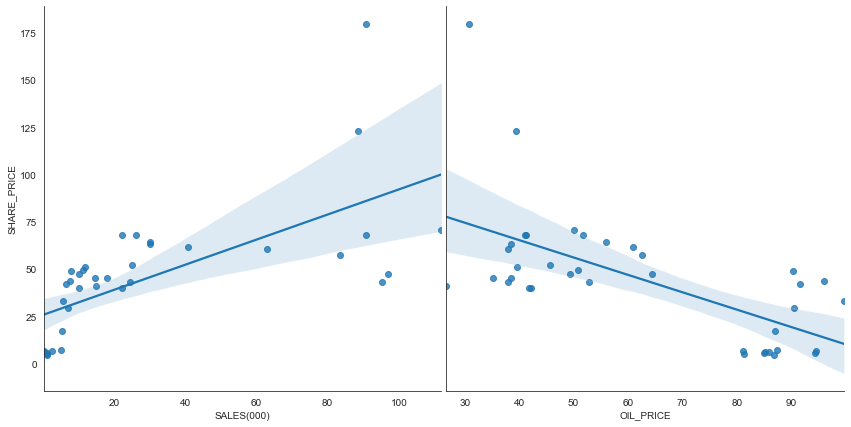

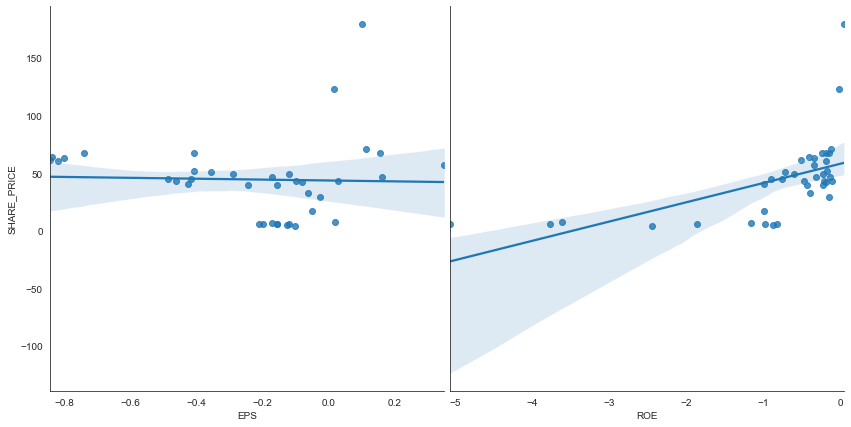

In [41]:
# Using PAIRPLOT from SEABORN.

sns.set_style("white")
sns.pairplot(tsla,x_vars=['SALES(000)','OIL_PRICE'],y_vars='SHARE_PRICE',height=6,kind='reg',diag_kind=None)
sns.pairplot(tsla,x_vars=['EPS','ROE'], y_vars='SHARE_PRICE',height=6,kind='reg',diag_kind=None)

# 

SHARE PRICE ~ SALES(000) has been fit POORLY by the Linear regression line. # IMPROVEMENT NEEDED!
The trend is actually not linear but more of a polynomial fit, so higher order must be explored.

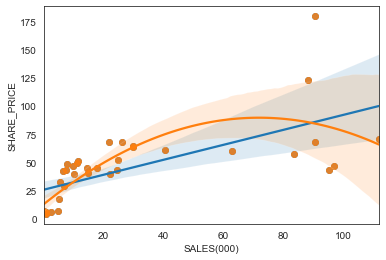

In [42]:
# SUPERIMPOSING plots of ORDER 1 and 2 for COMPARISON.

sns.regplot(x="SALES(000)", y="SHARE_PRICE", scatter=True, order=1, data=tsla)
plt.xlabel('SALES(000)');
plt.ylabel('SHARE_PRICE');

sns.regplot(x="SALES(000)", y="SHARE_PRICE", scatter=True, order=2, data=tsla)
plt.xlabel('SALES(000)');
plt.ylabel('SHARE_PRICE');

Second oreder relation gives a better model fit.

# 

SHARE PRICE ~ OIL PRICE shows a GOOD FIT but DOWNWARD SLOPE! A weird thing to witness. # INTERPRETATION NEEDED!
After further analysis it has been found that infact our assumption that oil prices predict shrare prices was incorrect. Favourable EV policies around the world have given rise to a situation where oil prices are being determined by the supply and demand of electric vehicles. DROP the feature OIL PRICE from further analysis.

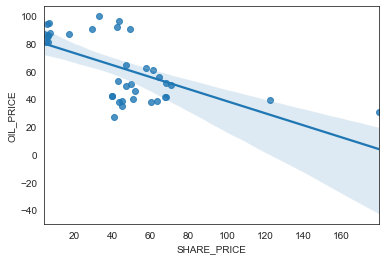

In [43]:
# VERIFYING how SHARE PRICES are determining OIL PRICES and not vice versa.

sns.regplot(x="SHARE_PRICE", y="OIL_PRICE", scatter=True, order=1, data=tsla)
plt.xlabel('SHARE_PRICE');
plt.ylabel('OIL_PRICE');

INDEED! The INCREASE in share price DECREASES the price of oil per barrel.

# 

SHARE PRICE ~ EPS  shows an HORIZONTAL LINE with OUTLIERS AT RIGHT EXTREME. # INTERPRETATION NEEDED!
As ssen from the data the EPS for TESLA remained NEGATIVE CONSISTENTLY for a loot of years and recently turned positive. Ths implies that initialy the company was in losses and has turned profitable only recently. So, the model fit seems to not affect the share price. DROP the feature EPS from further analysis.

# 

SHARE PRICE ~ ROE shows an upward trend.

# 

# LASSO REGRESSION

Now selected features that affect SHARE PRICES are SALES,ROE and the once rejected are OIL PRICE and EPS.
We need to verify our approach is justified via LASSO REGRESSION (Least Absolute Shrinkage and Selection Operator) 
which is a regression techique that shrinks the coefs of unimportant features to 0 and regularize the data to
provide the best fit model that helps preventing overfitting or underfitting.

In [44]:
# FEATURE SELECTION FROM COEF SHRINKAGE.

from sklearn.linear_model import Lasso
x=tsla[["SALES(000)","OIL_PRICE","EPS","ROE","DEVELOPMENTS","COMPETITORS"]]
y=tsla[["SHARE_PRICE"]]
l=Lasso(normalize=True)
model=l.fit(x,y)
print("INTERCEPT",model.intercept_,"\n")
print("COEFS",model.coef_,"\n")
print("R_SQUARED", model.score(x,y),"\n")

INTERCEPT [61.73412393] 

COEFS [ 0.29768613 -0.35007811  0.          4.499854    0.          0.        ] 

R_SQUARED 0.5591103390583192 



BINGO! Our analysis was correct. LASSO has shrunk the coefs of all unimportant features to 0 and we can DROP
OIL PRICE,EPS,DEVELOPMENTS AND COMPETITORS from the model. Also, it seems to now explain only 56% of data. This means our earleir model was OVERFITTING the trend line.

# 

# LIN LOG REGRESSION

LIN LOG regression can be used instead of log log. Scale dependent variable (SHARE PRICE) by log scale and
leave the independent variables (SALES and ROE) as linear to generate the model.

In [45]:
# LIN LOG SCALE

x=tsla[["SALES(000)","ROE"]]
y=tsla[["SHARE_PRICE"]]

y_log=np.log(y)

lr=LinearRegression(normalize=True)
model=lr.fit(x,y_log)

print("INTERCEPT", model.intercept_,"\n")
print("COEFS", model.coef_,"\n")
print("R_SQUARED", model.score(x,y_log),"\n")

model_stats = sm.OLS(y_log,x).fit()
print("P VALUES OF EACH FEATURE")
print(model_stats.pvalues)

INTERCEPT [3.53424234] 

COEFS [[0.01082123 0.50240636]] 

R_SQUARED 0.6267359365524978 

P VALUES OF EACH FEATURE
SALES(000)    1.453818e-08
ROE           2.018113e-03
dtype: float64


This model is a more accurate presentation though it reduces the RSQUARED and explains less data as compared to
log log (62.7 %) with VERY LOW P VALUES (<0.05).

# log(SHARE PRICE)= 3.54 + 0.0108(SALES) + 0.5024(ROE)

# 

# POLYNOMIAL REGRESSION

Influence of dependent varaibles are always not linear. They can also be curvilinear or polynomial for that 
matter. Here we take into account the model for POLYNOMIAL REGRESSION with an aim to enhance our regression model further with HIGHER DEGREE realtions and INTERACTION EFFECT.

In [46]:
# REGRESSING ON POLYNOMIAL FIT.

from sklearn.preprocessing import PolynomialFeatures

x=tsla[["SALES(000)","ROE"]]
y=tsla[["SHARE_PRICE"]]

poly= PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x)               
poly.fit(x, y) 

lr=LinearRegression(normalize=True)
model=lr.fit(x_poly,y)

print("INTERCEPT", model.intercept_,"\n")
print("COEFS", model.coef_,"\n")
print("R2_SCORE", model.score(x_poly,y),"\n")

model_stats = sm.OLS(y,x_poly).fit()
print("P VALUES OF EACH FEATURE")
print(model_stats.pvalues)

INTERCEPT [24.89356596] 

COEFS [[ 0.          2.72024492 10.15251352 -0.01944017  2.06981994  2.06888032]] 

R2_SCORE 0.731026762854947 

P VALUES OF EACH FEATURE
const    0.029516
x1       0.000069
x2       0.432855
x3       0.000568
x4       0.001718
x5       0.410607
dtype: float64


The POLYNOMIAL REGRESSION has fited a good model with very low p values and 
explains 73% of data. But looking at the p values of x1=ROE and x5=ROE^2 its clear it is non significant. RECALL 
the MULTICOLINEARITY THAT WAS SEEN IN ROE AND SALES, which is causing this. Also, the interaction coef is low. this indicates that ROE itself is not affecting the SHARE PRICE.

Try to fit QUADRATIC DEGREE of SALES to log scale of SHARE PRICE.

In [47]:
x=tsla[["SALES(000)"]]
y=tsla[["SHARE_PRICE"]]

poly= PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x) 
y_log=np.log(y)

poly.fit(x, y) 

lr=LinearRegression(normalize=True)
model=lr.fit(x_poly,y_log)

print("INTERCEPT", model.intercept_,"\n")
print("COEFS", model.coef_,"\n")
print("R2_SCORE", model.score(x_poly,y_log),"\n")

model_stats = sm.OLS(y_log,x_poly).fit()
print("P VALUES OF EACH FEATURE")
print(model_stats.pvalues)

INTERCEPT [2.34256101] 

COEFS [[ 0.          0.08364169 -0.0006629 ]] 

R2_SCORE 0.6513360087144033 

P VALUES OF EACH FEATURE
const    9.142417e-16
x1       1.299234e-07
x2       5.915584e-06
dtype: float64


A GOOD FIT MODEL EXPLAINING 65% DATA AND VERY LOW FEATURE P VALUES!

# log(SHARE PRICE)= 2.342 + 0.083(SALES) -0.005(SALES)^2

# 

# FINAL WORD:  TESLA IS A WILD BUBBLE?

TESLA INC is a high risk technology company. The sudden share price growth can only be attributed to the enhanced 
SALES and deliveries the firm made, entry to S&P INDEX. Despite facing losses for majority of the operating life ,
Tesla has supporters both individuals and growth investors who believe and buy the story of a visionary EVM future 
besides luxury. People are contemplating that the speed of shift to EV's though slow now will be exponential
in near future and will generate huge returns. This factor of the brand image and sentiment make investors boost
their SHARE investments.

Thus, concluding that both our research and analysis support that only attributable factors are SALES and 
BRAND SENTIMENT.

Ergo, TESLA SHARE PRICES SEEM TO BE A WILD BUBBLE!!